In [56]:
from tbparse import SummaryReader
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
log_dir = "/home/coder/ray_results/fedavg_blades_v2"
reader = SummaryReader(log_dir, extra_columns=set(["dir_name"]))

In [ ]:
def apply_ipm_naming(adv, scale):
    if adv != "blades.adversaries.IPMAdversary":
        return adv
    return f"{adv} (ε={scale})"

In [67]:
hparams_df = reader.hparams.pivot(index='dir_name', columns='tag', values='value').reset_index()
hparams_df["adversary_config/type"] = hparams_df.apply(lambda x: apply_ipm_naming(x["adversary_config/type"], x["adversary_config/scale"]), axis=1)
hparams_df

tag,dir_name,adversary_config/scale,adversary_config/type,client_config/momentum,num_malicious_clients,random_seed,server_config/aggregator/type,server_config/optimizer/momentum
0,FEDAVG_97907_00000_0_adversary_config=type_bla...,NaN,blades.adversaries.ALIEAdversary,0.0,0.0,121.0,Median,0.0
1,FEDAVG_97907_00001_1_adversary_config=type_bla...,NaN,blades.adversaries.NoiseAdversary,0.0,0.0,121.0,Median,0.0
2,FEDAVG_97907_00002_2_adversary_config=type_bla...,NaN,blades.adversaries.SignFlipAdversary,0.0,0.0,121.0,Median,0.0
3,FEDAVG_97907_00003_3_adversary_config=type_bla...,0.1,blades.adversaries.IPMAdversary (ε=0.1),0.0,0.0,121.0,Median,0.0
4,FEDAVG_97907_00004_4_adversary_config=type_bla...,100.0,blades.adversaries.IPMAdversary (ε=100.0),0.0,0.0,121.0,Median,0.0
...,...,...,...,...,...,...,...,...
67,FEDAVG_97907_00099_99_adversary_config=type_bl...,0.1,blades.adversaries.IPMAdversary (ε=0.1),0.0,24.0,121.0,Signguard,0.0
68,FEDAVG_97907_00100_100_adversary_config=type_b...,100.0,blades.adversaries.IPMAdversary (ε=100.0),0.0,24.0,121.0,Signguard,0.0
69,FEDAVG_97907_00102_102_adversary_config=type_b...,NaN,blades.adversaries.ALIEAdversary,0.0,30.0,121.0,Signguard,0.0
70,FEDAVG_97907_00104_104_adversary_config=type_b...,NaN,blades.adversaries.SignFlipAdversary,0.0,30.0,121.0,Signguard,0.0


In [68]:
acc_top_1_df = scalars_df.loc[scalars_df["tag"] == "ray/tune/acc_top_1"].reset_index() \
                .merge(hparams_df, on=["dir_name"], validate="m:1")
acc_top_1_df

,index,step,tag,value,dir_name,adversary_config/scale,adversary_config/type,client_config/momentum,num_malicious_clients,random_seed,server_config/aggregator/type,server_config/optimizer/momentum
0,0,50,ray/tune/acc_top_1,0.418143,FEDAVG_97907_00000_0_adversary_config=type_bla...,NaN,blades.adversaries.ALIEAdversary,0.0,0.0,121.0,Median,0.0
1,1,100,ray/tune/acc_top_1,0.518051,FEDAVG_97907_00000_0_adversary_config=type_bla...,NaN,blades.adversaries.ALIEAdversary,0.0,0.0,121.0,Median,0.0
2,2,150,ray/tune/acc_top_1,0.504749,FEDAVG_97907_00000_0_adversary_config=type_bla...,NaN,blades.adversaries.ALIEAdversary,0.0,0.0,121.0,Median,0.0
3,3,200,ray/tune/acc_top_1,0.607858,FEDAVG_97907_00000_0_adversary_config=type_bla...,NaN,blades.adversaries.ALIEAdversary,0.0,0.0,121.0,Median,0.0
4,4,250,ray/tune/acc_top_1,0.607759,FEDAVG_97907_00000_0_adversary_config=type_bla...,NaN,blades.adversaries.ALIEAdversary,0.0,0.0,121.0,Median,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,482838,1300,ray/tune/acc_top_1,0.221525,FEDAVG_97907_00105_105_adversary_config=type_b...,0.1,blades.adversaries.IPMAdversary (ε=0.1),0.0,30.0,121.0,Signguard,0.0
2156,482839,1350,ray/tune/acc_top_1,0.180218,FEDAVG_97907_00105_105_adversary_config=type_b...,0.1,blades.adversaries.IPMAdversary (ε=0.1),0.0,30.0,121.0,Signguard,0.0
2157,482840,1400,ray/tune/acc_top_1,0.170217,FEDAVG_97907_00105_105_adversary_config=type_b...,0.1,blades.adversaries.IPMAdversary (ε=0.1),0.0,30.0,121.0,Signguard,0.0
2158,482841,1450,ray/tune/acc_top_1,0.175016,FEDAVG_97907_00105_105_adversary_config=type_b...,0.1,blades.adversaries.IPMAdversary (ε=0.1),0.0,30.0,121.0,Signguard,0.0


In [73]:
best_acc_top_1_df = acc_top_1_df.groupby(
    ["dir_name", 
     "adversary_config/scale", 
     "adversary_config/type", 
     "num_malicious_clients", 
     "server_config/aggregator/type"],
    dropna=False,
    as_index=False,
)[["dir_name", 
     "adversary_config/scale", 
     "adversary_config/type", 
     "num_malicious_clients", 
     "server_config/aggregator/type",
     "value",
  ]].agg("max")

best_acc_top_1_df.columns = ["dir_name", 
     "adversary_config/scale", 
     "adversary_config/type", 
     "num_malicious_clients", 
     "server_config/aggregator/type",
     "best_top_1_acc",
]
best_acc_top_1_df

,dir_name,adversary_config/scale,adversary_config/type,num_malicious_clients,server_config/aggregator/type,best_top_1_acc
0,FEDAVG_97907_00000_0_adversary_config=type_bla...,NaN,blades.adversaries.ALIEAdversary,0.0,Median,0.846089
1,FEDAVG_97907_00001_1_adversary_config=type_bla...,NaN,blades.adversaries.NoiseAdversary,0.0,Median,0.846089
2,FEDAVG_97907_00002_2_adversary_config=type_bla...,NaN,blades.adversaries.SignFlipAdversary,0.0,Median,0.846089
3,FEDAVG_97907_00003_3_adversary_config=type_bla...,0.1,blades.adversaries.IPMAdversary (ε=0.1),0.0,Median,0.846089
4,FEDAVG_97907_00004_4_adversary_config=type_bla...,100.0,blades.adversaries.IPMAdversary (ε=100.0),0.0,Median,0.846089
...,...,...,...,...,...,...
67,FEDAVG_97907_00099_99_adversary_config=type_bl...,0.1,blades.adversaries.IPMAdversary (ε=0.1),24.0,Signguard,0.816986
68,FEDAVG_97907_00100_100_adversary_config=type_b...,100.0,blades.adversaries.IPMAdversary (ε=100.0),24.0,Signguard,0.132913
69,FEDAVG_97907_00102_102_adversary_config=type_b...,NaN,blades.adversaries.ALIEAdversary,30.0,Signguard,0.207122
70,FEDAVG_97907_00104_104_adversary_config=type_b...,NaN,blades.adversaries.SignFlipAdversary,30.0,Signguard,0.290426


In [79]:
def within_eps(x, y, eps):
    return abs(x - y) < eps

In [106]:
best_accuracy = acc_top_1_df["value"].max()
eps = 0.05
converged_df = acc_top_1_df.loc[acc_top_1_df.apply(lambda x: within_eps(x["value"], best_accuracy, eps), axis=1)]

time_to_convergence_df = converged_df.groupby(
    ["dir_name", 
     "adversary_config/scale", 
     "adversary_config/type", 
     "num_malicious_clients", 
     "server_config/aggregator/type"],
    dropna=False,
    as_index=False,
)[["dir_name", 
     "adversary_config/scale", 
     "adversary_config/type", 
     "num_malicious_clients", 
     "server_config/aggregator/type",
     "step",
  ]].agg("min")

time_to_convergence_df.columns = ["dir_name", 
     "adversary_config/scale", 
     "adversary_config/type", 
     "num_malicious_clients", 
     "server_config/aggregator/type",
     "time_to_convergence",
]
time_to_convergence_df

,dir_name,adversary_config/scale,adversary_config/type,num_malicious_clients,server_config/aggregator/type,time_to_convergence
0,FEDAVG_97907_00000_0_adversary_config=type_bla...,NaN,blades.adversaries.ALIEAdversary,0.0,Median,750
1,FEDAVG_97907_00001_1_adversary_config=type_bla...,NaN,blades.adversaries.NoiseAdversary,0.0,Median,750
2,FEDAVG_97907_00002_2_adversary_config=type_bla...,NaN,blades.adversaries.SignFlipAdversary,0.0,Median,750
3,FEDAVG_97907_00003_3_adversary_config=type_bla...,0.1,blades.adversaries.IPMAdversary (ε=0.1),0.0,Median,750
4,FEDAVG_97907_00004_4_adversary_config=type_bla...,100.0,blades.adversaries.IPMAdversary (ε=100.0),0.0,Median,750
5,FEDAVG_97907_00005_5_adversary_config=type_bla...,NaN,blades.adversaries.MinMaxAdversary,0.0,Median,750
6,FEDAVG_97907_00008_8_adversary_config=type_bla...,NaN,blades.adversaries.SignFlipAdversary,6.0,Median,950
7,FEDAVG_97907_00009_9_adversary_config=type_bla...,0.1,blades.adversaries.IPMAdversary (ε=0.1),6.0,Median,1050
8,FEDAVG_97907_00010_10_adversary_config=type_bl...,100.0,blades.adversaries.IPMAdversary (ε=100.0),6.0,Median,1200
9,FEDAVG_97907_00036_36_adversary_config=type_bl...,NaN,blades.adversaries.ALIEAdversary,0.0,Trimmedmean,800


In [89]:
time_to_convergence_df

,dir_name,adversary_config/scale,adversary_config/type,num_malicious_clients,server_config/aggregator/type,time_to_convergence
0,FEDAVG_97907_00000_0_adversary_config=type_bla...,NaN,blades.adversaries.ALIEAdversary,0.0,Median,700
1,FEDAVG_97907_00001_1_adversary_config=type_bla...,NaN,blades.adversaries.NoiseAdversary,0.0,Median,700
2,FEDAVG_97907_00002_2_adversary_config=type_bla...,NaN,blades.adversaries.SignFlipAdversary,0.0,Median,700
3,FEDAVG_97907_00003_3_adversary_config=type_bla...,0.1,blades.adversaries.IPMAdversary (ε=0.1),0.0,Median,700
4,FEDAVG_97907_00004_4_adversary_config=type_bla...,100.0,blades.adversaries.IPMAdversary (ε=100.0),0.0,Median,700
...,...,...,...,...,...,...
67,FEDAVG_97907_00099_99_adversary_config=type_bl...,0.1,blades.adversaries.IPMAdversary (ε=0.1),24.0,Signguard,700
68,FEDAVG_97907_00100_100_adversary_config=type_b...,100.0,blades.adversaries.IPMAdversary (ε=100.0),24.0,Signguard,50
69,FEDAVG_97907_00102_102_adversary_config=type_b...,NaN,blades.adversaries.ALIEAdversary,30.0,Signguard,50
70,FEDAVG_97907_00104_104_adversary_config=type_b...,NaN,blades.adversaries.SignFlipAdversary,30.0,Signguard,600


/tmp/ipykernel_23430/2636546611.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defense_results["frac_malicious_clients"] = 100 * defense_results["num_malicious_clients"] \
/tmp/ipykernel_23430/2636546611.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defense_results["acc_top_1_pct"] = 100 * defense_results["best_top_1_acc"]
/tmp/ipykernel_23430/2636546611.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

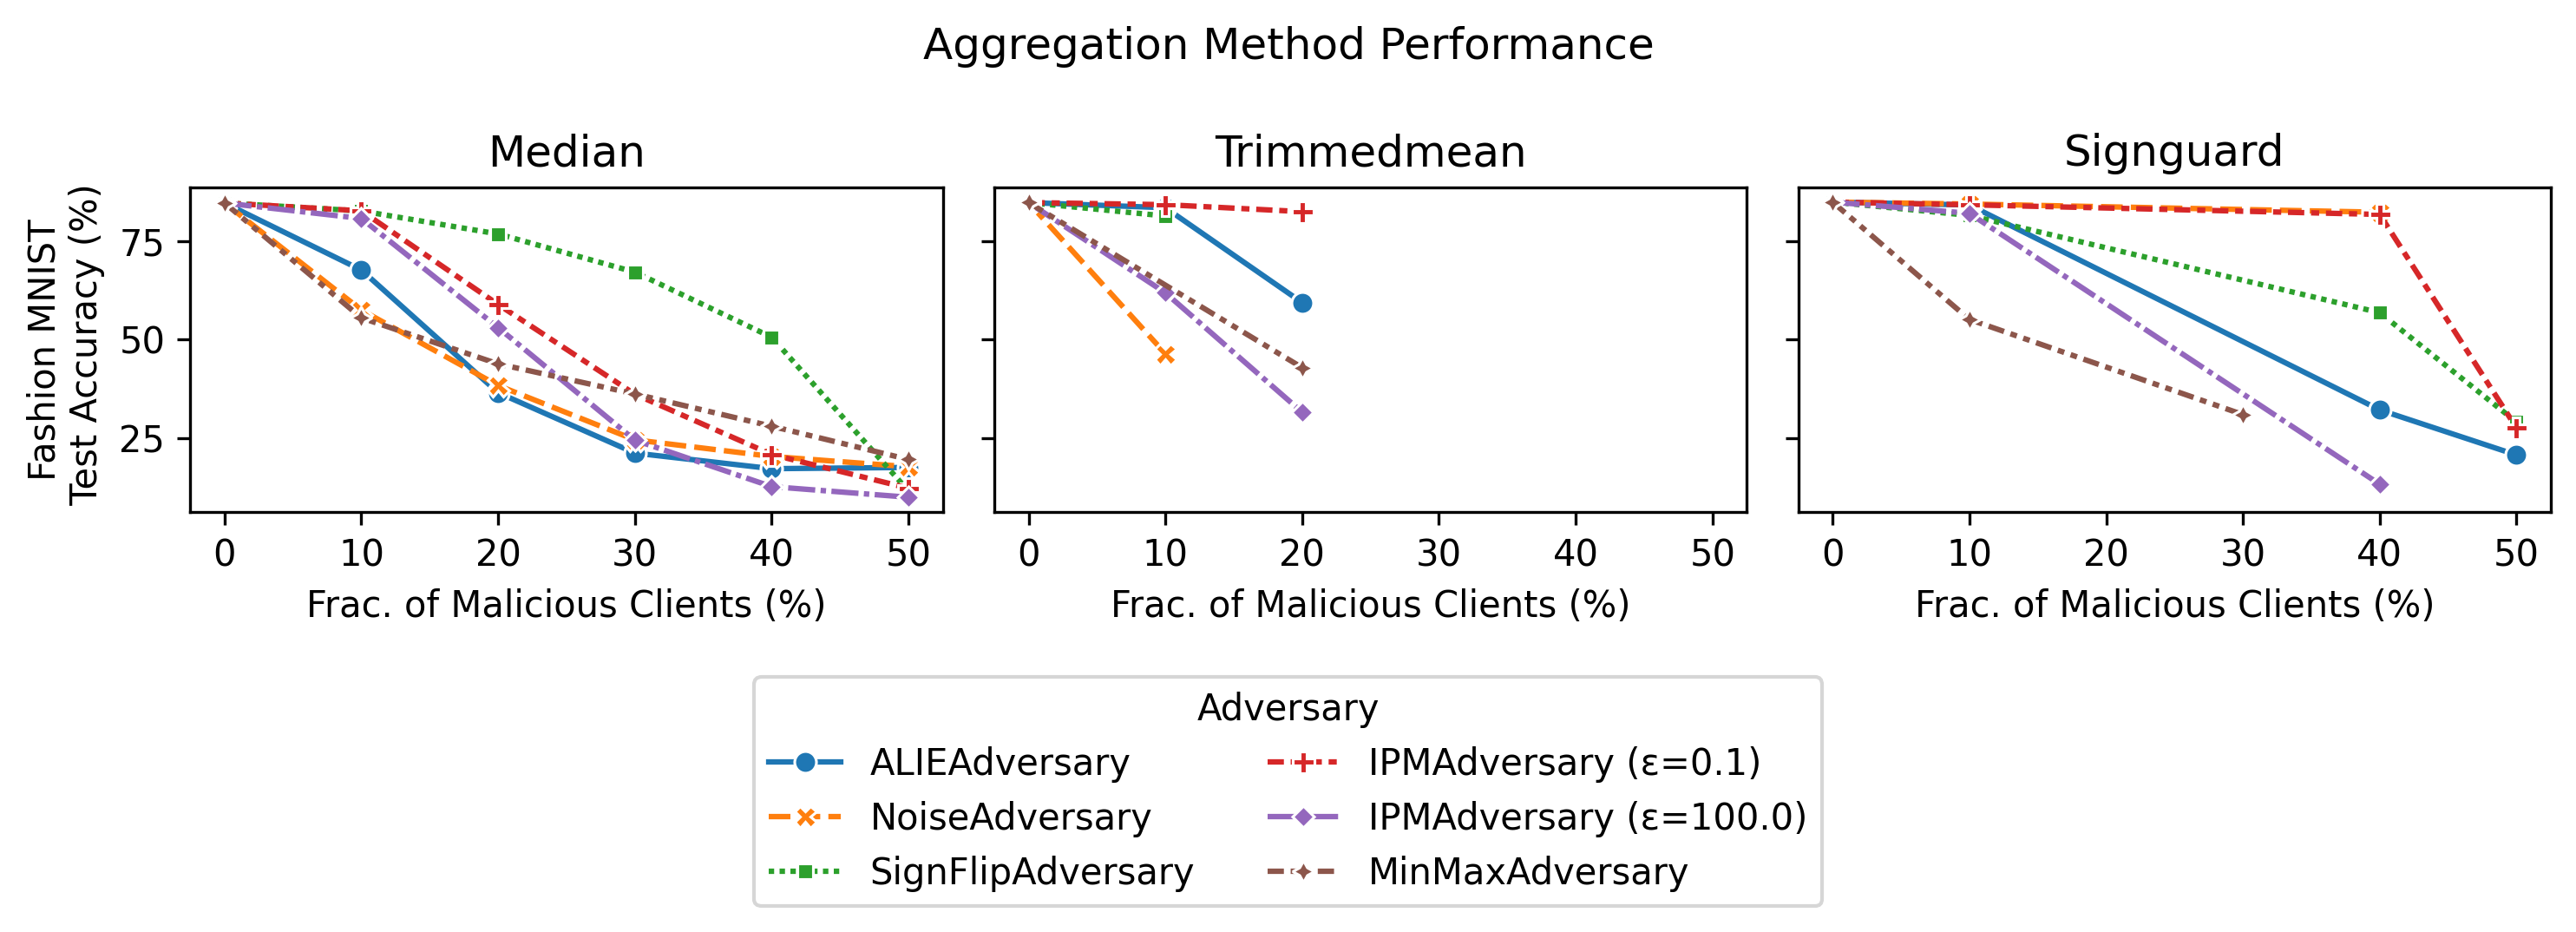

In [74]:
defenses = best_acc_top_1_df["server_config/aggregator/type"].unique()
num_clients = 60

fig, ax = plt.subplots(1, len(defenses), figsize=(10, 2.5), dpi=300, sharex=True, sharey=True)
for i, defense in enumerate(defenses):
    defense_results = best_acc_top_1_df[best_acc_top_1_df["server_config/aggregator/type"] == defense]
    defense_results["frac_malicious_clients"] = 100 * defense_results["num_malicious_clients"] \
                                                / num_clients
    defense_results["acc_top_1_pct"] = 100 * defense_results["best_top_1_acc"]
    sns.lineplot(
        data=defense_results,
        x="frac_malicious_clients",
        y="acc_top_1_pct",
        style="adversary_config/type",
        hue="adversary_config/type",
        ax=ax[i],
        markers=True
    )
    ax[i].set_title(defense)
    ax[i].set_xlabel("Frac. of Malicious Clients (%)")
    ax[i].set_ylabel("Fashion MNIST\n Test Accuracy (%)")

    handles, labels = ax[i].get_legend_handles_labels()
    labels = [l.split("blades.adversaries.")[-1] for l in labels]
    ax[i].get_legend().remove()

    
fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, -0.4), ncols=2, fancybox=True, title="Adversary")
fig.suptitle("Aggregation Method Performance")
plt.tight_layout()

fig.savefig("figures/20250430_cifar10_resnet_top1acc.pdf")

/tmp/ipykernel_23430/2717320900.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defense_results["frac_malicious_clients"] = 100 * defense_results["num_malicious_clients"] \
/tmp/ipykernel_23430/2717320900.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defense_results["frac_malicious_clients"] = 100 * defense_results["num_malicious_clients"] \
/tmp/ipykernel_23430/2717320900.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

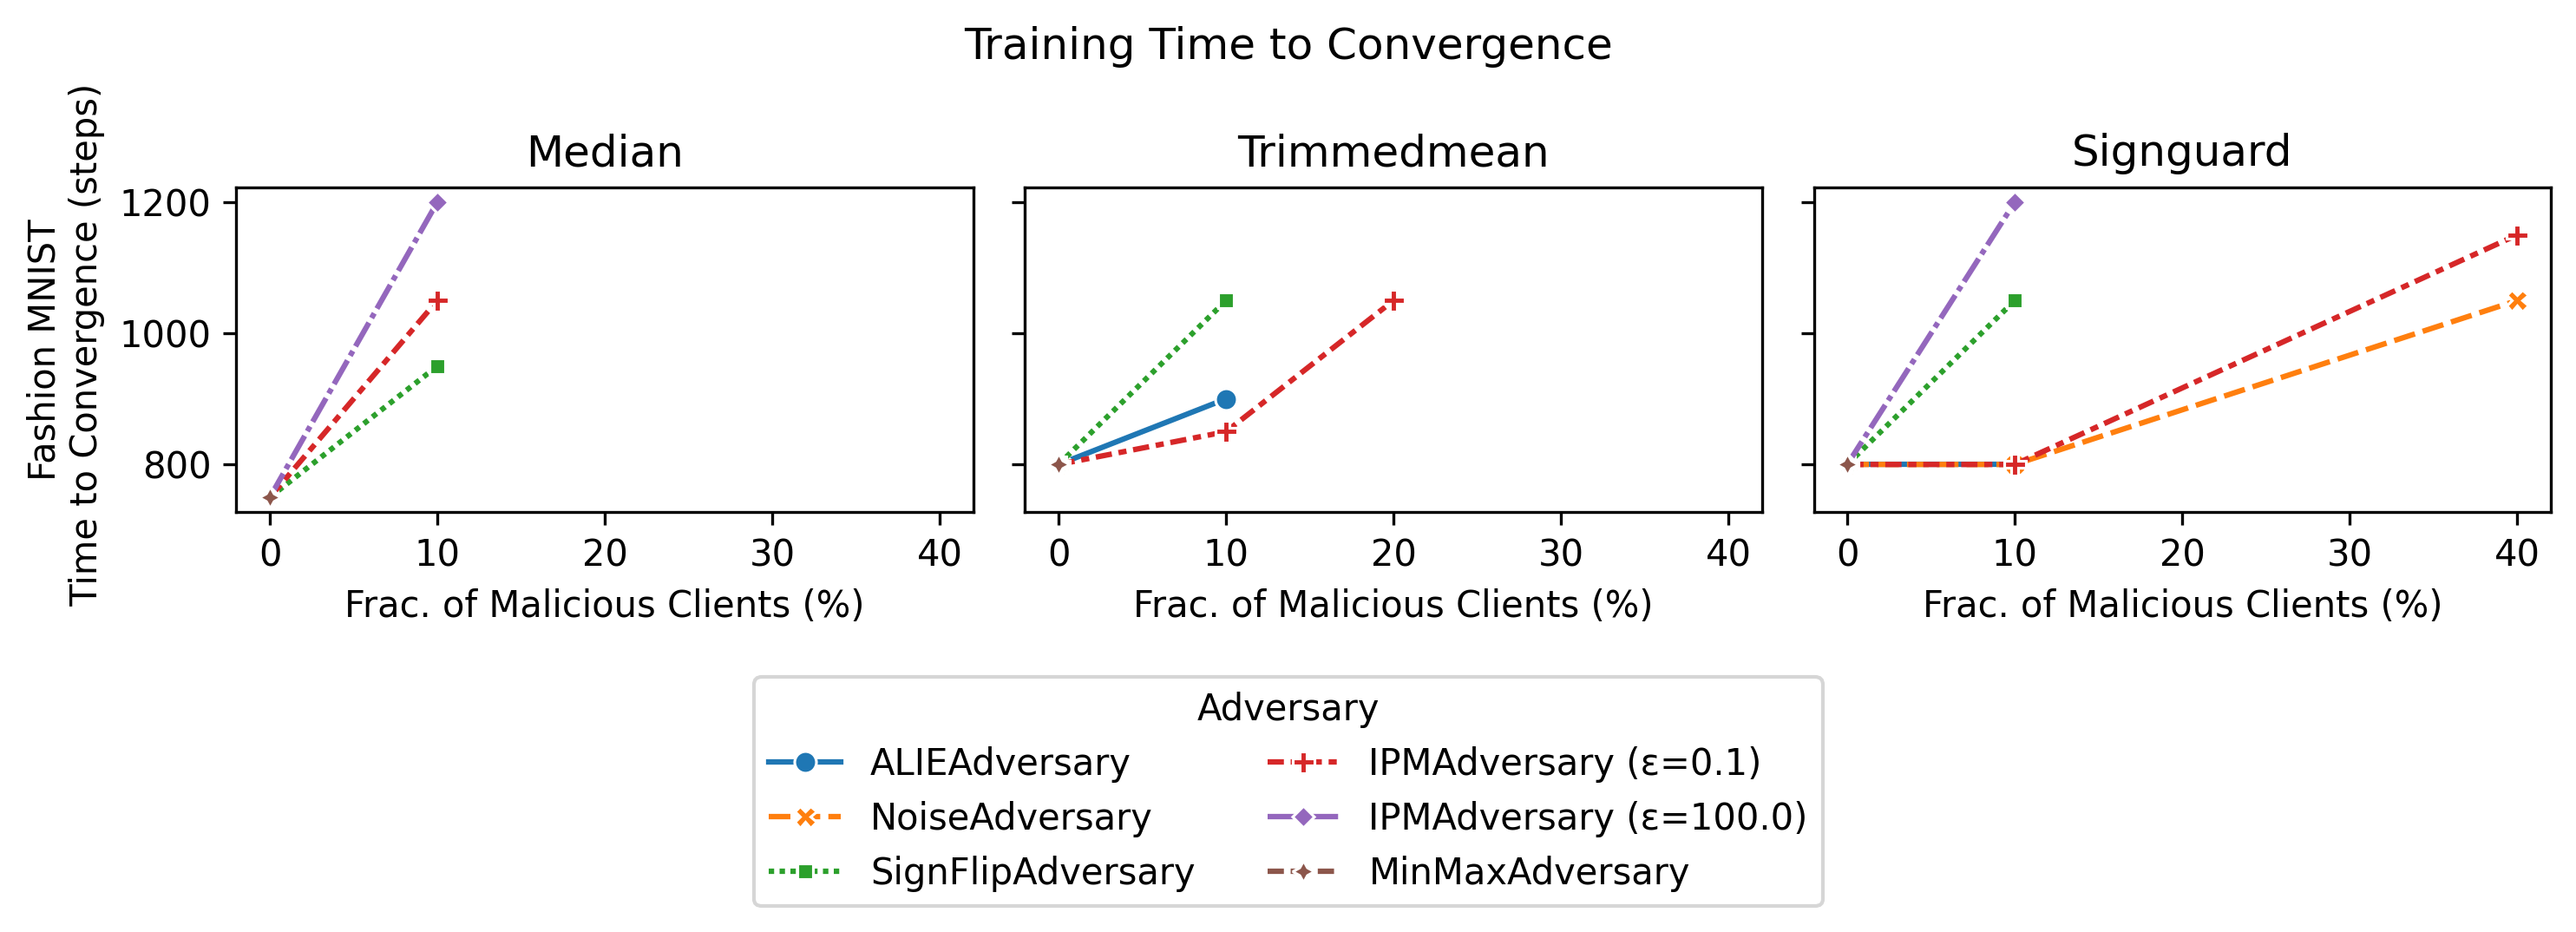

In [107]:
defenses = time_to_convergence_df["server_config/aggregator/type"].unique()
num_clients = 60

fig, ax = plt.subplots(1, len(defenses), figsize=(10, 2.5), dpi=300, sharex=True, sharey=True)
for i, defense in enumerate(defenses):
    defense_results = time_to_convergence_df[time_to_convergence_df["server_config/aggregator/type"] == defense]
    defense_results["frac_malicious_clients"] = 100 * defense_results["num_malicious_clients"] \
                                                / num_clients
    sns.lineplot(
        data=defense_results,
        x="frac_malicious_clients",
        y="time_to_convergence",
        style="adversary_config/type",
        hue="adversary_config/type",
        ax=ax[i],
        markers=True
    )
    ax[i].set_title(defense)
    ax[i].set_xlabel("Frac. of Malicious Clients (%)")
    ax[i].set_ylabel("Fashion MNIST\n Time to Convergence (steps)")

    handles, labels = ax[i].get_legend_handles_labels()
    labels = [l.split("blades.adversaries.")[-1] for l in labels]
    ax[i].get_legend().remove()

    
fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, -0.4), ncols=2, fancybox=True, title="Adversary")
fig.suptitle("Training Time to Convergence")
plt.tight_layout()

fig.savefig("figures/20250430_cifar10_resnet_ttc.pdf")